In [5]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt

In [6]:
IMAGE_SIZE = 256

BATCH_SIZE = 32

CHANNELS = 3

Epochs = 30

In [7]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    r"C:\Users\kshat\OneDrive\Desktop\archive\PlantVillage", 
    shuffle = True,
    image_size = (IMAGE_SIZE,IMAGE_SIZE),
    batch_size = BATCH_SIZE)

Found 2152 files belonging to 3 classes.


In [8]:
class_names = dataset.class_names
class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [9]:
len(dataset)

68

In [10]:
for image_batch, label_batch in dataset.take(1):
    print(image_batch.shape)
    print(label_batch.numpy())

(32, 256, 256, 3)
[1 1 0 0 0 0 0 1 0 0 1 1 1 0 1 0 0 1 1 1 1 2 0 0 1 1 0 0 1 0 1 0]


In [11]:
for image_batch, label_batch in dataset.take(1):
    print(image_batch[0])

tf.Tensor(
[[[154. 147. 155.]
  [155. 148. 156.]
  [158. 151. 159.]
  ...
  [153. 147. 159.]
  [159. 153. 165.]
  [164. 158. 170.]]

 [[151. 144. 152.]
  [152. 145. 153.]
  [154. 147. 155.]
  ...
  [164. 158. 170.]
  [166. 160. 172.]
  [166. 160. 172.]]

 [[150. 143. 151.]
  [151. 144. 152.]
  [152. 145. 153.]
  ...
  [167. 161. 173.]
  [165. 159. 171.]
  [161. 155. 167.]]

 ...

 [[129. 116. 125.]
  [104.  91. 100.]
  [111.  98. 107.]
  ...
  [120. 108. 118.]
  [118. 106. 116.]
  [128. 116. 126.]]

 [[101.  88.  97.]
  [ 95.  82.  91.]
  [108.  95. 104.]
  ...
  [112. 100. 110.]
  [127. 115. 125.]
  [145. 133. 143.]]

 [[119. 106. 115.]
  [136. 123. 132.]
  [108.  95. 104.]
  ...
  [123. 111. 121.]
  [134. 122. 132.]
  [137. 125. 135.]]], shape=(256, 256, 3), dtype=float32)


In [12]:
for image_batch, label_batch in dataset.take(1):
    print(image_batch[0].numpy())

[[[101.  97. 112.]
  [123. 119. 134.]
  [122. 118. 132.]
  ...
  [173. 171. 184.]
  [153. 151. 164.]
  [175. 173. 186.]]

 [[124. 120. 135.]
  [121. 117. 132.]
  [111. 107. 121.]
  ...
  [152. 150. 163.]
  [175. 173. 186.]
  [162. 160. 173.]]

 [[134. 130. 145.]
  [113. 109. 124.]
  [106. 102. 116.]
  ...
  [196. 194. 207.]
  [192. 190. 203.]
  [158. 156. 169.]]

 ...

 [[130. 128. 142.]
  [118. 116. 130.]
  [132. 130. 144.]
  ...
  [198. 201. 210.]
  [168. 171. 180.]
  [187. 190. 199.]]

 [[149. 147. 161.]
  [153. 151. 165.]
  [143. 141. 155.]
  ...
  [183. 186. 195.]
  [171. 174. 183.]
  [194. 197. 206.]]

 [[120. 118. 132.]
  [129. 127. 141.]
  [ 96.  94. 108.]
  ...
  [172. 175. 184.]
  [168. 171. 180.]
  [179. 182. 191.]]]


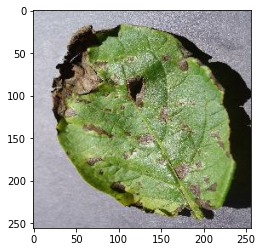

In [13]:
for image_batch, label_batch in dataset.take(1):
    plt.imshow(image_batch[0].numpy().astype("uint8"))

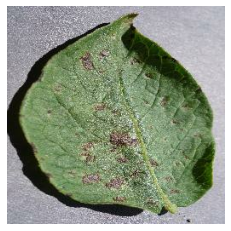

In [14]:
for image_batch, label_batch in dataset.take(1):
    plt.imshow(image_batch[0].numpy().astype("uint8"))
    plt.axis("off")

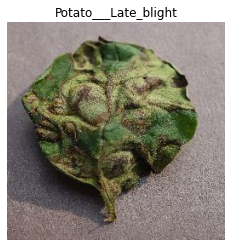

In [15]:
for image_batch, label_batch in dataset.take(1):
    plt.imshow(image_batch[0].numpy().astype("uint8"))
    plt.title(class_names[label_batch[0]])
    plt.axis("off")

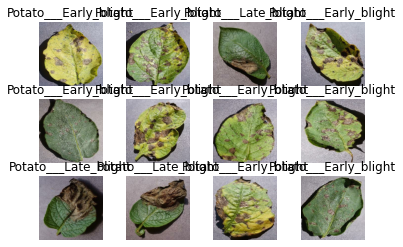

In [16]:
for image_batch, label_batch in dataset.take(1):
    for i in range(12):
        ax = plt.subplot(3,4,i+1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_names[label_batch[i]])
        plt.axis("off")

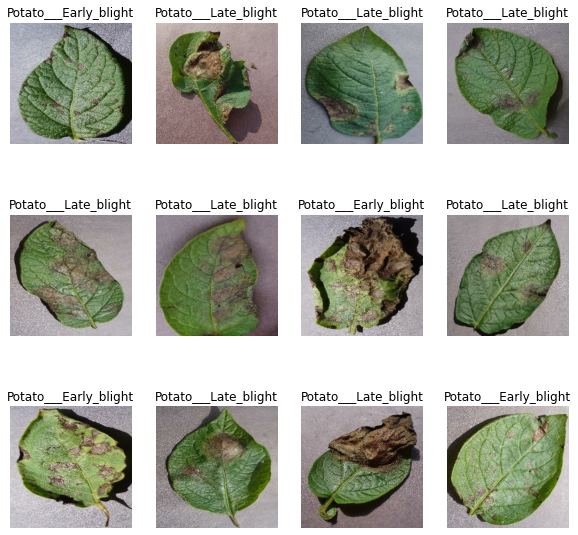

In [17]:
plt.figure(figsize=(10,10))
for image_batch, label_batch in dataset.take(1):
    for i in range(12):
        ax = plt.subplot(3,4,i+1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_names[label_batch[i]])
        plt.axis("off")

In [18]:
train_size = 0.8
len(dataset)*train_size

54.400000000000006

In [19]:
train_ds = dataset.take(54)
len(train_ds)

54

In [20]:
test_ds = dataset.skip(54)
len(test_ds)

14

In [21]:
val_size = 0.1
len(dataset)*val_size

6.800000000000001

In [22]:
val_ds = test_ds.take(6)
len(val_ds)

6

In [23]:
test_ds = test_ds.skip(6)
len(test_ds)

8

In [24]:
def get_dataset_partition_tf(ds, train_split=0.8, val_split=0.1, test_split=0.1, shuffle=True, shuffle_size=10000):
    ds_size = len(ds)
    
    if shuffle:
        ds = ds.shuffle(shuffle_size, seed=12)
    val_size = int(val_split*ds_size)
    train_size = int(train_split*ds_size)
    
    train_ds = ds.take(train_size)
    
    val_ds = ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size).skip(val_size)
    
    return train_ds, val_ds, test_ds

In [25]:
train_ds, val_ds, test_ds = get_dataset_partition_tf(dataset)

In [26]:
len(train_ds)

54

In [27]:
len(val_ds)

6

In [28]:
len(test_ds)

8

In [29]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [30]:
resize_and_rescale = tf.keras.Sequential([
    layers.experimental.preprocessing.Resizing(IMAGE_SIZE, IMAGE_SIZE),
    layers.experimental.preprocessing.Rescaling(1.0/255)
])

In [31]:
data_augmentation = tf.keras.Sequential([
    layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
    layers.experimental.preprocessing.RandomRotation(0.2),
])

In [32]:
input_shape = (BATCH_SIZE, IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes = 3

model = models.Sequential([
    resize_and_rescale,
    data_augmentation,
    layers.Conv2D(32, (3,3), activation='relu', input_shape = input_shape),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
     layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
     layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax'),
])

model.build(input_shape=input_shape)

In [33]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (32, 256, 256, 3)         0         
                                                                 
 sequential_1 (Sequential)   (32, 256, 256, 3)         0         
                                                                 
 conv2d (Conv2D)             (32, 254, 254, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (32, 127, 127, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (32, 125, 125, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (32, 62, 62, 64)         0         
 2D)                                                  

In [34]:
model.compile(
              optimizer = 'adam',
              loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              metrics=['accuracy']
)

In [35]:
history = model.fit(
              train_ds,
              epochs=Epochs,
              batch_size=BATCH_SIZE,
              verbose=1,
              validation_data=val_ds
)

Epoch 1/30
54/54 [==============================] - 191s 3s/step - loss: 0.9279 - accuracy: 0.4641 - val_loss: 0.8541 - val_accuracy: 0.4115
Epoch 2/30
54/54 [==============================] - 102s 2s/step - loss: 0.8005 - accuracy: 0.5845 - val_loss: 0.6984 - val_accuracy: 0.7604
Epoch 3/30
54/54 [==============================] - 112s 2s/step - loss: 0.5620 - accuracy: 0.7749 - val_loss: 0.4970 - val_accuracy: 0.8229
Epoch 4/30
54/54 [==============================] - 106s 2s/step - loss: 0.3987 - accuracy: 0.8472 - val_loss: 0.3822 - val_accuracy: 0.8490
Epoch 5/30
54/54 [==============================] - 103s 2s/step - loss: 0.3568 - accuracy: 0.8466 - val_loss: 0.3811 - val_accuracy: 0.8385
Epoch 6/30
54/54 [==============================] - 113s 2s/step - loss: 0.2490 - accuracy: 0.9074 - val_loss: 0.1988 - val_accuracy: 0.9271
Epoch 7/30
54/54 [==============================] - 104s 2s/step - loss: 0.2028 - accuracy: 0.9225 - val_loss: 0.2182 - val_accuracy: 0.9167
Epoch 8/30
54

In [36]:
scores = model.evaluate(test_ds)

8/8 [==============================] - 32s 307ms/step - loss: 0.2784 - accuracy: 0.9141


In [37]:
scores

[0.2784155309200287, 0.9140625]

In [38]:
history

In [39]:
history.params

{'verbose': 1, 'epochs': 30, 'steps': 54}

In [40]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [41]:
len(history.history['accuracy'])

30

In [42]:
history.history['accuracy']

[0.46412035822868347,
 0.5844907164573669,
 0.7748842835426331,
 0.8472222089767456,
 0.8466435074806213,
 0.9074074029922485,
 0.9224537014961243,
 0.9160879850387573,
 0.9270833134651184,
 0.9201388955116272,
 0.9484953880310059,
 0.9270833134651184,
 0.9560185074806213,
 0.9496527910232544,
 0.9479166865348816,
 0.9380787014961243,
 0.9670138955116272,
 0.9589120149612427,
 0.96875,
 0.9606481194496155,
 0.9762731194496155,
 0.9728009104728699,
 0.9797453880310059,
 0.9745370149612427,
 0.9803240895271301,
 0.96875,
 0.9762731194496155,
 0.9780092835426331,
 0.9791666865348816,
 0.9866898059844971]

In [43]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

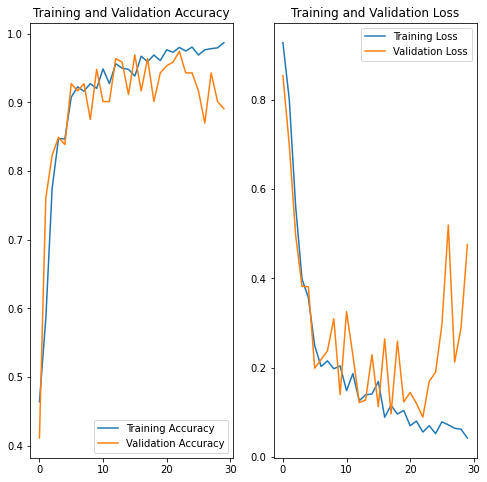

In [44]:
plt.figure(figsize=(8,8))
plt.subplot(1, 2, 1)
plt.plot(range(Epochs), acc, label='Training Accuracy')
plt.plot(range(Epochs), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')


plt.subplot(1, 2, 2)
plt.plot(range(Epochs), loss, label='Training Loss')
plt.plot(range(Epochs), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

first image to predict
first image's actual label: Potato___Early_blight
1/1 [==============================] - 15s 15s/step
Predicted Labe: Potato___Early_blight


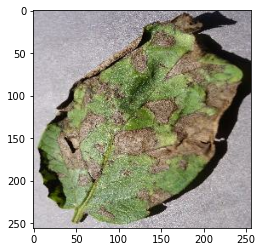

In [45]:
import numpy as np 
for image_batch, labels_batch in test_ds.take(1):

    first_image = image_batch[0].numpy().astype('uint8')
    first_label = labels_batch[0]

    print("first image to predict")
    plt.imshow(first_image)
    print("first image's actual label:", class_names[first_label])

    batch_prediction = model.predict(image_batch)
    print("Predicted Labe:", class_names[np.argmax(batch_prediction[0])])

In [46]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array, 0) # Create a Batch
    
    predictions = model.predict(img_array)
    
    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    
    return predicted_class, confidence

1/1 [==============================] - 0s 28ms/step


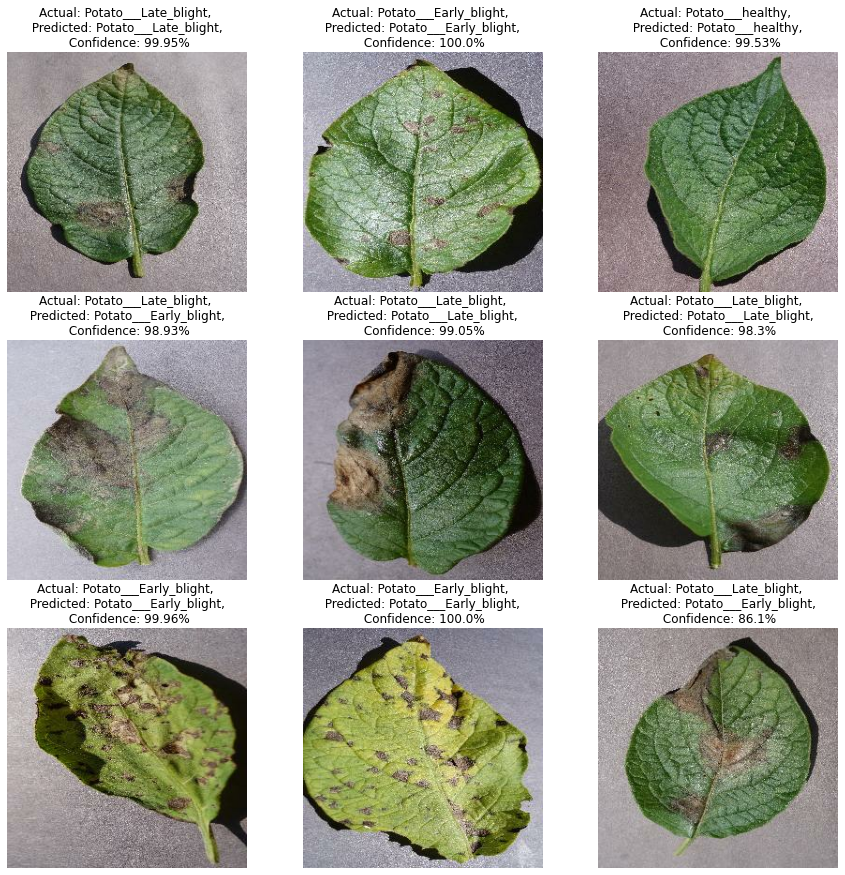

In [47]:
plt.figure(figsize=(15,15))
for images, labels in test_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        
        predicted_class, confidence = predict(model, images[i].numpy())
        actual_class = class_names[labels[i]]
        
        plt.title(f"Actual: {actual_class}, \n Predicted: {predicted_class}, \n Confidence: {confidence}%")
        
        
        plt.axis("off")

In [49]:
import os
model_version = max([int(i) for i in os.listdir(r"D:\BACKUP\E DRIVE\CP2_Model_code") + [0]])+1
model.save(f"D:/BACKUP/E DRIVE/CP2_Model_code/{model_version}")

INFO:tensorflow:Assets written to: D:/BACKUP/E DRIVE/CP2_Model_code/2\assets


INFO:tensorflow:Assets written to: D:/BACKUP/E DRIVE/CP2_Model_code/2\assets


In [50]:
os.getcwd()



'C:\\Users\\kshat'